In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer 
import numpy as np

In [0]:
import tensorflow

In [0]:
mnist = tensorflow.keras.datasets.mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [72]:
train_images.shape

(60000, 28, 28)

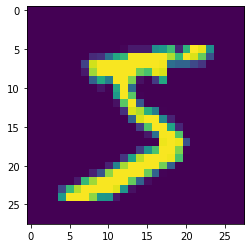

In [73]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])

In [74]:
train_images[0].shape

(28, 28)

In [0]:
# Chuẩn hóa dữ liệu về [0, 1]

trainX = train_images / 255.0
testX = test_images / 255.0


lb = LabelBinarizer()

trainY = lb.fit_transform(train_labels)
testY = lb.fit_transform(test_labels)

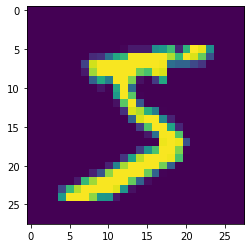

In [76]:
plt.imshow(trainX[0])

In [77]:
trainY[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [78]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(1024, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))


model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_10 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)             

In [0]:
opt = SGD(learning_rate=0.001, momentum=0.9)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["acc"])

In [81]:
H = model.fit(trainX, trainY, batch_size=32, epochs=20, validation_data=(testX, testY), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3951 - acc: 0.8793 - val_loss: 0.1279 - val_acc: 0.9594
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2058 - acc: 0.9377 - val_loss: 0.0964 - val_acc: 0.9711
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1600 - acc: 0.9506 - val_loss: 0.0833 - val_acc: 0.9756
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1369 - acc: 0.9573 - val_loss: 0.0738 - val_acc: 0.9774
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1175 - acc: 0.9639 - val_loss: 0.0691 - val_acc: 0.9798
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1025 - acc: 0.9686 - val_loss: 0.0640 - val_acc: 0.9808
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0916 - acc: 0.9715 - val_loss: 0.0651 - val_acc: 0.9811
Epoch 8/20
1875/1875 [==============================] - 6s 3ms

In [88]:
H.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

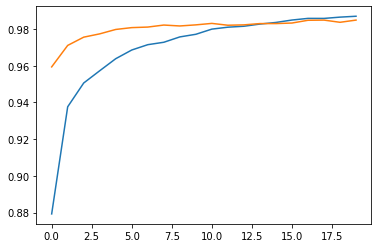

In [89]:
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.show()

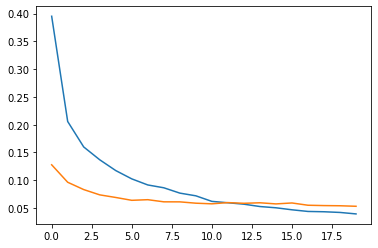

In [90]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.show()

In [0]:
model.save("model.h5")

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model_saved = load_model("/content/model.h5")

In [119]:
index = model_saved.predict_classes(test_images[230:231])
print("Index:",testY[index])
print("Class:", test_labels[index])

Index: [[1 0 0 0 0 0 0 0 0 0]]
Class: [0]
